In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob

from sklearn.utils import resample
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [67]:
files = glob('./BaseCovid/lbp-train-*')

df = pd.DataFrame()

for file in files:
    df_c = pd.read_csv(file) #add another parameters if it needs 
    df = pd.concat([df, df_c]) 

df.head()

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,attribute10,...,attribute51,attribute52,attribute53,attribute54,attribute55,attribute56,attribute57,attribute58,attribute59,class
0,0.075886,0.014334,0.005196,0.007222,0.013591,0.005992,0.009150,0.005415,0.006211,0.006018,...,0.012746,0.008909,0.009219,0.012990,0.009921,0.012211,0.011541,0.105307,0.227895,R/Normal
1,0.039125,0.012820,0.002017,0.005860,0.010533,0.004874,0.012281,0.002194,0.005033,0.004204,...,0.019908,0.008882,0.013311,0.007958,0.014499,0.022874,0.009236,0.134147,0.189746,R/Normal
2,0.091066,0.015227,0.004476,0.005555,0.015568,0.004611,0.006435,0.004858,0.004993,0.003415,...,0.014893,0.007136,0.010070,0.016400,0.009680,0.016052,0.012968,0.134093,0.269535,R/Normal
3,0.073723,0.013937,0.004365,0.006334,0.012340,0.005586,0.009651,0.004792,0.005753,0.005975,...,0.013954,0.011468,0.012409,0.014666,0.010273,0.013845,0.010722,0.106613,0.224195,R/Normal
4,0.070146,0.014820,0.005368,0.007559,0.013164,0.006354,0.010104,0.005340,0.006194,0.007272,...,0.012691,0.009170,0.009396,0.011686,0.009882,0.012239,0.010920,0.098767,0.213185,R/Normal


In [68]:
df.isnull().sum()

attribute1     0
attribute2     0
attribute3     0
attribute4     0
attribute5     0
attribute6     0
attribute7     0
attribute8     0
attribute9     0
attribute10    0
attribute11    0
attribute12    0
attribute13    0
attribute14    0
attribute15    0
attribute16    0
attribute17    0
attribute18    0
attribute19    0
attribute20    0
attribute21    0
attribute22    0
attribute23    0
attribute24    0
attribute25    0
attribute26    0
attribute27    0
attribute28    0
attribute29    0
attribute30    0
attribute31    0
attribute32    0
attribute33    0
attribute34    0
attribute35    0
attribute36    0
attribute37    0
attribute38    0
attribute39    0
attribute40    0
attribute41    0
attribute42    0
attribute43    0
attribute44    0
attribute45    0
attribute46    0
attribute47    0
attribute48    0
attribute49    0
attribute50    0
attribute51    0
attribute52    0
attribute53    0
attribute54    0
attribute55    0
attribute56    0
attribute57    0
attribute58    0
attribute59   

In [69]:
cat = df.select_dtypes(include=['object']).columns.tolist()
for col in cat:
    print(col)
    print(df[col].unique())

class
['R/Normal' 'R/Pneumonia/Acellular/Viral/Coronavirus/COVID-19'
 'R/Pneumonia/Acellular/Viral/Coronavirus/MERS'
 'R/Pneumonia/Acellular/Viral/Coronavirus/SARS'
 'R/Pneumonia/Acellular/Viral/Varicella'
 'R/Pneumonia/Celullar/Bacterial/Streptococcus'
 'R/Pneumonia/Celullar/Fungus/Pneumocystis']


<Axes: xlabel='class', ylabel='count'>

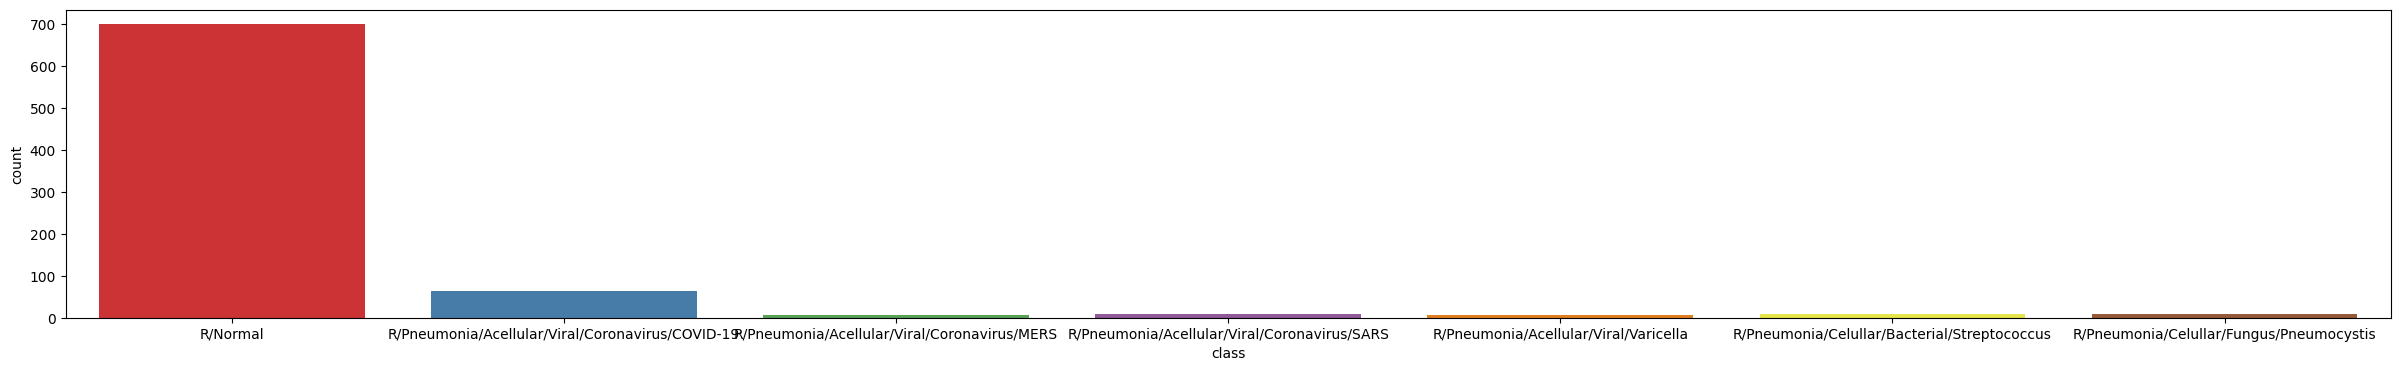

In [70]:
plt.figure(figsize=(30, 4))
sns.countplot(x='class', hue='class', data=df, palette='Set1')

In [71]:
y_train = pd.DataFrame(df["class"])
X_train = df.drop(["class"], axis=1)

y_train = y_train.to_numpy()
X_train = X_train.to_numpy()

In [72]:
test = pd.read_csv('./BaseCovid/lbp-test.csv')

y_test = pd.DataFrame(test["class"])
X_test = test.drop(["class"], axis=1)

y_test = y_test.to_numpy()
X_test = X_test.to_numpy()

c:\Users\witch\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8771929824561403
                                                  precision    recall  f1-score   support

                                        R/Normal       0.88      1.00      0.93       300
R/Pneumonia/Acellular/Viral/Coronavirus/COVID-19       0.00      0.00      0.00        27
    R/Pneumonia/Acellular/Viral/Coronavirus/MERS       0.00      0.00      0.00         3
    R/Pneumonia/Acellular/Viral/Coronavirus/SARS       0.00      0.00      0.00         3
           R/Pneumonia/Acellular/Viral/Varicella       0.00      0.00      0.00         3
    R/Pneumonia/Celullar/Bacterial/Streptococcus       0.00      0.00      0.00         3
        R/Pneumonia/Celullar/Fungus/Pneumocystis       0.00      0.00      0.00         3

                                        accuracy                           0.88       342
                                       macro avg       0.13      0.14      0.13       342
                                    weighted avg       0.77      0.88      0.82

c:\Users\witch\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\witch\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\witch\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\witch\AppData\Local\Programs\

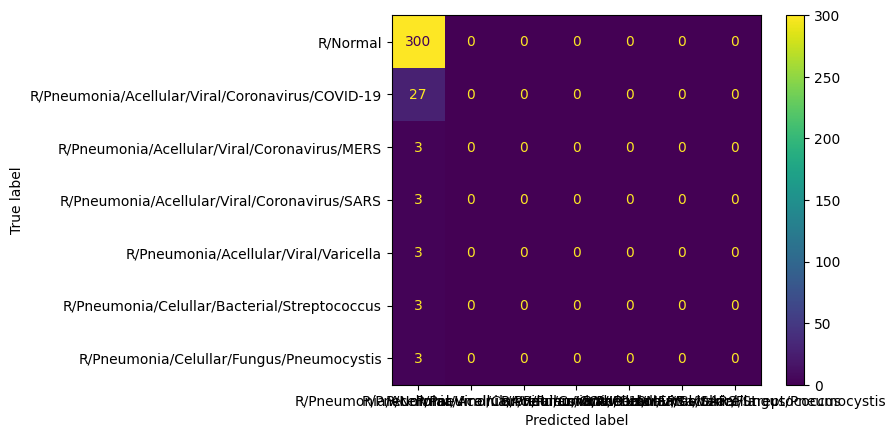

In [73]:
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
y_resp = mlp.predict(X_test)

print(accuracy_score(y_test, y_resp))
print(classification_report(y_test, y_resp))

cm = confusion_matrix(y_test, y_resp, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=mlp.classes_)
disp.plot()

plt.show()

In [74]:
ext = df[df['class'] != 'R/Normal']
ext = ext[ext['class'] != 'R/Pneumonia/Acellular/Viral/Coronavirus/COVID-19']
min = df[df['class'] == 'R/Pneumonia/Acellular/Viral/Coronavirus/SARS']
maj1 = df[df['class'] == 'R/Normal']
maj2 = df[df['class'] == 'R/Pneumonia/Acellular/Viral/Coronavirus/COVID-19']

print(len(ext))

maj1 = resample(maj1, replace=False, n_samples=len(maj2), random_state=42)
ext = resample(ext, replace=True, n_samples=len(maj2)*5, random_state=42)

print(len(ext))

df = pd.concat([ext, maj1, maj2])

df.head()

39
315


,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,attribute10,...,attribute51,attribute52,attribute53,attribute54,attribute55,attribute56,attribute57,attribute58,attribute59,class
156,0.006505,0.004179,0.000303,0.003724,0.003027,0.003052,0.024178,0.000295,0.003066,0.007872,...,0.010667,0.019317,0.010716,0.002255,0.011721,0.010522,0.002880,0.074922,0.052236,R/Pneumonia/Celullar/Fungus/Pneumocystis
152,0.056562,0.013131,0.004451,0.008223,0.011610,0.006278,0.011062,0.004725,0.007655,0.008588,...,0.011623,0.015121,0.011812,0.010005,0.013104,0.011414,0.010840,0.079253,0.179175,R/Pneumonia/Acellular/Viral/Coronavirus/MERS
157,0.052436,0.013407,0.004295,0.008302,0.009158,0.006823,0.013161,0.004324,0.007292,0.009499,...,0.012802,0.013784,0.011612,0.008566,0.012654,0.011661,0.009872,0.078402,0.165832,R/Pneumonia/Acellular/Viral/Varicella
160,0.051871,0.014501,0.002446,0.006590,0.012844,0.005896,0.012547,0.002501,0.006095,0.005084,...,0.017476,0.009302,0.014325,0.010016,0.013975,0.018712,0.009730,0.118515,0.210001,R/Pneumonia/Celullar/Bacterial/Streptococcus
153,0.046886,0.014152,0.002736,0.007162,0.009902,0.005071,0.010932,0.002912,0.005055,0.005716,...,0.015561,0.013408,0.013033,0.008852,0.015160,0.015337,0.010516,0.091150,0.177339,R/Pneumonia/Acellular/Viral/Coronavirus/MERS


<Axes: xlabel='class', ylabel='count'>

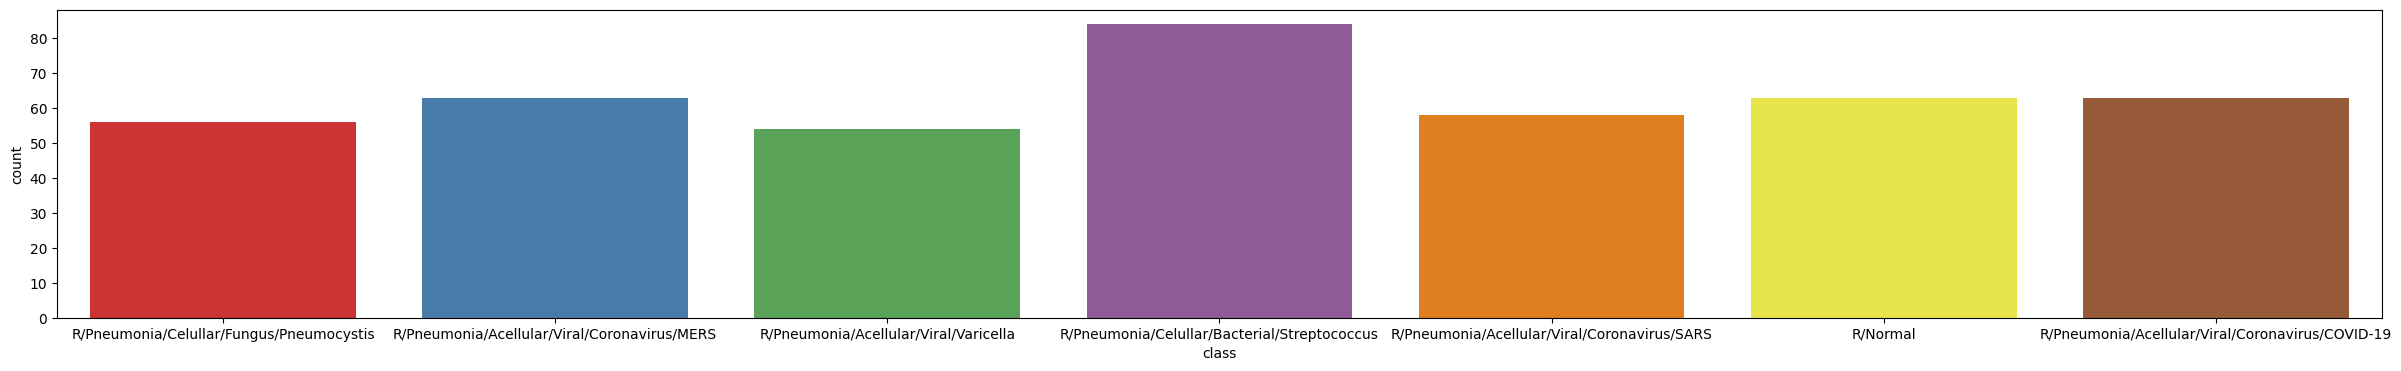

In [75]:
plt.figure(figsize=(30, 4))
sns.countplot(x='class', hue='class', data=df, palette='Set1')

In [76]:
y_train = pd.DataFrame(df["class"])
X_train = df.drop(["class"], axis=1)

y_train = y_train.to_numpy()
X_train = X_train.to_numpy()

In [77]:
test = pd.read_csv('./BaseCovid/lbp-test.csv')

y_test = pd.DataFrame(test["class"])
X_test = test.drop(["class"], axis=1)

y_test = y_test.to_numpy()
X_test = X_test.to_numpy()

c:\Users\witch\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8947368421052632
                                                  precision    recall  f1-score   support

                                        R/Normal       0.99      0.94      0.97       300
R/Pneumonia/Acellular/Viral/Coronavirus/COVID-19       0.57      0.59      0.58        27
    R/Pneumonia/Acellular/Viral/Coronavirus/MERS       0.23      1.00      0.38         3
    R/Pneumonia/Acellular/Viral/Coronavirus/SARS       1.00      0.33      0.50         3
           R/Pneumonia/Acellular/Viral/Varicella       0.17      0.33      0.22         3
    R/Pneumonia/Celullar/Bacterial/Streptococcus       0.25      0.33      0.29         3
        R/Pneumonia/Celullar/Fungus/Pneumocystis       0.20      0.33      0.25         3

                                        accuracy                           0.89       342
                                       macro avg       0.49      0.55      0.45       342
                                    weighted avg       0.93      0.89      0.91

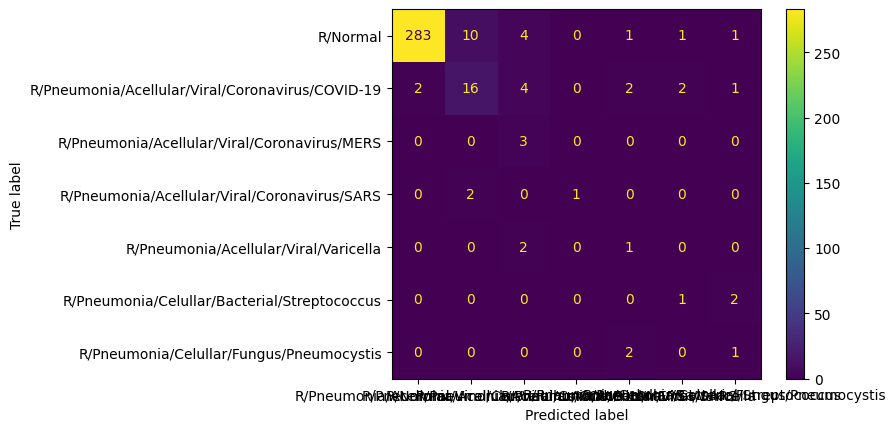

In [ ]:
mlp = MLPClassifier(max_iter=10000, random_state=42)
mlp.fit(X_train, y_train)
y_resp = mlp.predict(X_test)

print(accuracy_score(y_test, y_resp))
print(classification_report(y_test, y_resp))

cm = confusion_matrix(y_test, y_resp, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=mlp.classes_)
disp.plot()

plt.show()